# Listing 5-1. Computation of Pi through Monte Carlo Sampling 

In [2]:
import numpy as np
number_sample = 100000
inner_area,outer_area = 0,0

for i in range(number_sample):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    if (x**2 + y**2) < 1 :
        inner_area += 1
    outer_area += 1

print("The computed value of Pi:",4*(inner_area/float(outer_area))) 

The computed value of Pi: 3.13624


# Listing 5-2. Bivariate Gaussian distribution Sampling through Metropolis Algorithm 

Time taken to sample 47328 points :  19.834323167800903 seconds
Acceptance ratio : 0.47328
Mean of the Sampled Points: (0.00997325991215009 ,0.011477155604676485)
Covariance matrix of the Sampled Points

[[1.03305002 0.7040541 ]
 [0.7040541  1.03426927]]


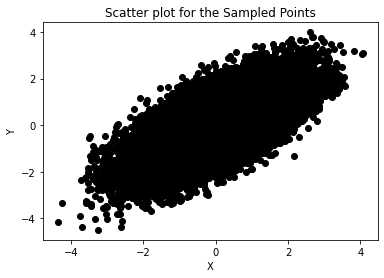

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
start_time = time.time()

"""
 Generate samples from Bivariate Guassian Distribution with mean (0,0) and covariance of 0.7 using 
 Markov Chain Monte Carlo(MCMC) method called Metropolis Hastings algorithm.
 
 We will use a Indepdendent Gaussian transition probability distribution with covariaace 0.2 
 So the next point X_next is going to be sampled from a Gaussian Distribution with current point X_curr as the mean 
 and the Transition Covariance of 0.2
 
 X_next ~ N(X_curr,covariance=[[0.2 , 0],[0,0.2]])
 
"""



def metropolis_hastings(target_dist,cov_trans,num_samples=100000):
    
    _mean_,_cov_ = target_dist[0],target_dist[1]
    
    x_list,y_list = [],[]
    accepted_samples_count = 0

    # Start with Initial Point (0,0)
    x_init, y_init = 0,0
    
    x_curr,y_curr = x_init, y_init
    
    for i in range(num_samples):

    # Set up the Conditional Probability distribution taking the curr point
    # as the mean and a small variance (we pass it through cov_trans) so that points near the existing point
    # have a high chance of getting sampled.
        
        
        mean_trans = np.array([x_curr,y_curr])
        # Sample next point using the transition distribution
        x_next, y_next = np.random.multivariate_normal(mean_trans,cov_trans).T
        X_next = np.array([x_next,y_next])
        X_next = np.matrix(X_next)
        X_curr = np.matrix(mean_trans)

        # Compute the probability density of the existing point and the new sampled
        # point. We can ignore the normalizer as it would cancel out when we take density ratio of next and curr point

        mahalnobis_dist_next = (X_next - _mean_)*np.linalg.inv(_cov_)*(X_next - _mean_).T
        prob_density_next = np.exp(-0.5*mahalnobis_dist_next)
        mahalnobis_dist_curr = (X_curr - _mean_)*np.linalg.inv(_cov_)*(X_curr - _mean_).T
        prob_density_curr = np.exp(-0.5*mahalnobis_dist_curr)

        # This is the heart of the algorithm. Comparing the ratio of Probability density of the new
        # point and the existing point(acceptance_ratio) and selecting the new point if it is have more probability
        # density. If it has less probability it is randomly selected with the probability of getting
        # selected being proportional to the ratio of the acceptance ratio
        
        acceptance_ratio = prob_density_next[0,0] / float(prob_density_curr[0,0])

        if (acceptance_ratio >= 1) | ((acceptance_ratio < 1) and (acceptance_ratio >= np.random.uniform(0,1)) ) :
            x_list.append(x_next)
            y_list.append(y_next)
            x_curr = x_next
            y_curr = y_next
            accepted_samples_count += 1

    end_time = time.time()

    print(f"Time taken to sample {accepted_samples_count} points :  {str(end_time - start_time)} seconds")
    print(f"Acceptance ratio : {accepted_samples_count/float(num_samples)}")
    print(f"Mean of the Sampled Points: ({np.mean(x_list)} ,{np.mean(y_list)})")
    print(f"Covariance matrix of the Sampled Points\n")
    print(np.cov(x_list,y_list)) 

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Scatter plot for the Sampled Points")
    plt.scatter(x_list,y_list,color='black')

# Let's trigger some MCMC
num_samples=100000
_cov_ = np.array([[1,0.7],[0.7,1]])
_mean_ = np.matrix(mean)
metropolis_hastings(target_dist=(_mean_,_cov_),cov_trans=np.array([[1,0.2],[0.2,1]]))

# Listing 5-3a. Restricted Boltzmann Machine Implementation with MNIST dataset 

Tensorflow version: 2.9.1
Completed Epoch 0
Completed Epoch 5
Completed Epoch 10
Completed Epoch 15
Completed Epoch 20
Completed Epoch 25
Completed Epoch 30
Completed Epoch 35
Completed Epoch 40
Completed Epoch 45
Completed Epoch 50
Completed Epoch 55
Completed Epoch 60
Completed Epoch 65
Completed Epoch 70
Completed Epoch 75
Completed Epoch 80
Completed Epoch 85
Completed Epoch 90
Completed Epoch 95
RBM training Completed !


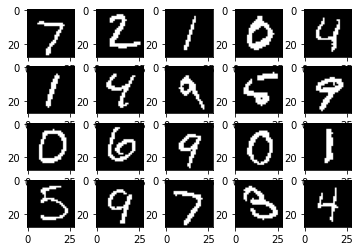

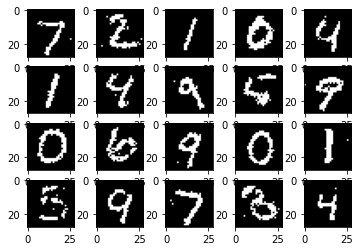

In [84]:
##Import the Required libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,Model
print(f"Tensorflow version: {tf.__version__}")
import matplotlib.pyplot as plt
%matplotlib inline


class rbm:
    def __init__(self,n_visible,n_hidden,lr=0.01,num_epochs=100,batch_size=256,weight_init='normal',k_steps=2):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weight_init = weight_init
        self.k = k_steps
        
        
    def model(self):
        if self.weight_init == 'glorot':
            self.W = tf.Variable(
                tf.random.normal([self.n_visible, self.n_hidden], mean=0.0, stddev=0.1, dtype=tf.float32) * tf.cast(tf.sqrt(
                 2 / (self.n_hidden + self.n_visible)), tf.float32),
                tf.float32, name="weights")
            
        elif self.weight_init == 'normal':
            self.W = tf.Variable(
                tf.random.normal([self.n_visible, self.n_hidden], mean=0.0, stddev=0.1,  dtype=tf.float32),
                tf.float32, name="weights")
        
        self.b_v = tf.Variable(tf.random.uniform([1, self.n_visible], 0, 0.1,  dtype=tf.float32),
                                          tf.float32, name="visible_biases")
        
        self.b_h = tf.Variable(tf.random.uniform([1, self.n_hidden], 0, 0.1, dtype=tf.float32),
                                         tf.float32, name="hidden_biases")
        
        self.model_params = {'weights': self.W, 'visible_biases': self.b_v,
                           'hidden_biases': self.b_h}
        

   # Converts the probability into discrete binary states i.e. 0 and 1 
    @staticmethod
    def sample(probs):
        return tf.floor(probs + tf.random.uniform(tf.shape(probs), 0, 1))
            
    def visible_to_hidden(self,x):
        h = self.sample(tf.sigmoid(tf.matmul(x, self.W) + self.b_h))
        return h
    
    def hidden_to_visible(self,h):
        x = self.sample(tf.sigmoid(tf.matmul(h, tf.transpose(self.W)) + self.b_v))
        return x 
        
  
    # Gibbs sampling step
    def gibbs_step(self,x):
        h = self.visible_to_hidden(x) 
        x = self.hidden_to_visible(h)
        return x
        
    # Run multiple gives Sampling step starting from an initital point     
    def gibbs_sample(self,x,k):
        for i in range(k):
            x = self.gibbs_step(x) 
        # Returns the gibbs sample after k iterations
        return x
    
    def data_load(self):
        (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
        train_X, test_X , = train_X.reshape(-1,28*28), test_X.reshape(-1,28*28)
        train_X, test_X = train_X/255.0, test_X/255.0
        train_X[train_X < 0.5], test_X[test_X < 0.5] = 0.0, 0.0
        train_X[train_X >= 0.5], test_X[test_X >= 0.5] = 1.0, 1.0
        return np.float32(train_X), train_Y, np.float32(test_X), test_Y
        
        
    def train_step(self,x,k):
        
        # Constrastive Sample
        x_s = self.gibbs_sample(x,k)
        h_s = self.sample(self.visible_to_hidden(x_s))
        h = self.sample(self.visible_to_hidden(x))
        # Update weights
        batch_size = tf.cast(tf.shape(x)[0], tf.float32)
        W_add  = tf.multiply(self.lr/batch_size, tf.subtract(tf.matmul(tf.transpose(x), h), tf.matmul(tf.transpose(x_s), h_s)))
        bv_add = tf.multiply(self.lr/batch_size, tf.reduce_sum(tf.subtract(x, x_s), 0, True))
        bh_add = tf.multiply(self.lr/batch_size, tf.reduce_sum(tf.subtract(h, h_s), 0, True))
        self.W.assign_add(W_add)
        self.b_h.assign_add(bh_add)
        self.b_v.assign_add(bv_add)
        
    def validation(self,x,y):
        
        x_reconst = self.gibbs_step(tf.constant(x))
        x_reconst = x_reconst.numpy()
        
        plt.figure(1)
        
        for k in range(20):
            plt.subplot(4, 5, k+1)
            image = x[k,:].reshape(28,28)
            image = np.reshape(image,(28,28))
            plt.imshow(image,cmap='gray')
            

        plt.figure(2)

        for k in range(20):
            plt.subplot(4, 5, k+1)
            image = x_reconst[k,:].reshape(28,28)
            plt.imshow(image,cmap='gray')
        
        
        
    def train_model(self):
        # Initialize the Model parameters
        self.model()
        train_X, train_Y, test_X, test_Y = self.data_load()
        num_train_recs = train_X.shape[0]
        
        batches = num_train_recs//self.batch_size
        order = np.arange(num_train_recs)
        for i in range(self.num_epochs):
            np.random.shuffle(order)
            train_X, train_Y = train_X[order], train_Y[order]
            
            for batch in range(batches):
                batch_xs = train_X[batch*self.batch_size:(batch+1)*self.batch_size]
                #print(batch_xs.shape)
                batch_xs = tf.constant(batch_xs)
                self.train_step(batch_xs,self.k)
        
            if i % 5 == 0 :
                print(f"Completed Epoch {i}")               
                self.model_params = {'weights': self.W, 'visible_biases': self.b_v,
                           'hidden_biases': self.b_h}
        
        print("RBM training Completed !")
        
        self.validation(x=test_X[:20,:], y=test_Y[:20])
        
        
        
        
rbm = rbm(n_visible=28*28,num_epochs=100,n_hidden=500)
rbm.train_model()


# Listing 5-3b. Basic Implementation of Deep Belief Network

Completed Epoch 0
Completed Epoch 5
Completed Epoch 10
Completed Epoch 15
Completed Epoch 20
Completed Epoch 25
Completed Epoch 30
Completed Epoch 35
Completed Epoch 40
Completed Epoch 45
Completed Epoch 50
Completed Epoch 55
Completed Epoch 60
Completed Epoch 65
Completed Epoch 70
Completed Epoch 75
Completed Epoch 80
Completed Epoch 85
Completed Epoch 90
Completed Epoch 95
RBM Pre-training Completed !
Classification training starts
Epoch 0, Training loss: 0.26531310059229535, Training Accuracy: 0.91905
Epoch 5, Training loss: 0.00810452818373839, Training Accuracy: 0.9969833333333333
Epoch 10, Training loss: 0.0005509987105925878, Training Accuracy: 0.9984
Epoch 15, Training loss: 0.0002357642552504937, Training Accuracy: 0.9984
Epoch 20, Training loss: 0.00011380589259788394, Training Accuracy: 0.9984
Epoch 25, Training loss: 5.822337546851486e-05, Training Accuracy: 0.9984
Epoch 30, Training loss: 3.0117418597607562e-05, Training Accuracy: 0.9984
Epoch 35, Training loss: 1.59302688

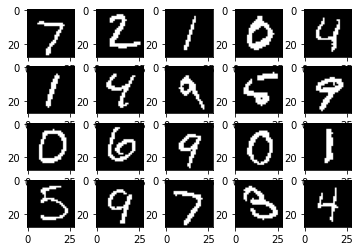

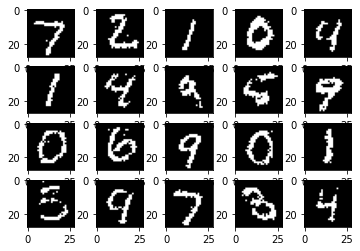

In [85]:
class rbm_pretrained_classifier:
    
    def __init__(self,n_visible,n_hidden,lr=0.01,n_out=10,num_epochs=100,batch_size=256,weight_init='normal',k_steps=2):
    
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.n_out = n_out
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weight_init = weight_init
        self.k = k_steps
        
        
    def model(self):
        
        if self.weight_init == 'glorot':
            self.W = tf.Variable(
                tf.random.normal([self.n_visible, self.n_hidden], mean=0.0, stddev=0.1, dtype=tf.float32) * tf.cast(tf.sqrt(
                 2 / (self.n_hidden + self.n_visible)), tf.float32),
                tf.float32, name="weights")
            
            self.Wf = tf.Variable(
                tf.random.normal([self.n_hidden,self.n_out], mean=0.0, stddev=0.1, dtype=tf.float32) * tf.cast(tf.sqrt(
                 2 / (self.n_hidden + self.n_out)), tf.float32),
                tf.float32, name="weights_final")
            
        elif self.weight_init == 'normal':
            self.W = tf.Variable(
                tf.random.normal([self.n_visible, self.n_hidden], mean=0.0, stddev=0.1,  dtype=tf.float32),
                tf.float32, name="weights")
            self.Wf = tf.Variable(
                tf.random.normal([self.n_hidden, self.n_out], mean=0.0, stddev=0.1,  dtype=tf.float32),
                tf.float32, name="weights_final")
        
        self.b_v = tf.Variable(tf.random.uniform([1, self.n_visible], 0, 0.1,  dtype=tf.float32),
                                          tf.float32, name="visible_biases")
        
        self.b_h = tf.Variable(tf.random.uniform([1, self.n_hidden], 0, 0.1, dtype=tf.float32),
                                         tf.float32, name="hidden_biases")
        
        self.b_f = tf.Variable(tf.random.uniform([1, self.n_out], 0, 0.1, dtype=tf.float32),
                                         tf.float32, name="final_biases")

        self.model_params = {'weights': self.W, 'visible_biases': self.b_v,
                           'hidden_biases': self.b_h, 'weights_final':self.Wf, 'final_biases':self.b_f}
        

   # Converts the probability into discrete binary states i.e. 0 and 1 
    @staticmethod
    def sample(probs):
        return tf.floor(probs + tf.random.uniform(tf.shape(probs), 0, 1))
            
    def visible_to_hidden(self,x):
        h = self.sample(tf.sigmoid(tf.matmul(x, self.W) + self.b_h))
        return h
    
    def hidden_to_visible(self,h):
        x = self.sample(tf.sigmoid(tf.matmul(h, tf.transpose(self.W)) + self.b_v))
        return x 
        
  
    # Gibbs sampling step
    def gibbs_step(self,x):
        h = self.visible_to_hidden(x) 
        x = self.hidden_to_visible(h)
        return x
        
    # Run multiple gives Sampling step starting from an initital point     
    def gibbs_sample(self,x,k):
        for i in range(k):
            x = self.gibbs_step(x) 
        # Returns the gibbs sample after k iterations
        return x
    
    def data_load(self):
        (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
        train_X, test_X , = train_X.reshape(-1,28*28), test_X.reshape(-1,28*28)
        train_X, test_X = train_X/255.0, test_X/255.0
        train_X[train_X < 0.5], test_X[test_X < 0.5] = 0.0, 0.0
        train_X[train_X >= 0.5], test_X[test_X >= 0.5] = 1.0, 1.0
        return np.float32(train_X), train_Y, np.float32(test_X), test_Y
        
        
    def train_rbm_step(self,x,k):
        
        # Constrastive Sample
        x_s = self.gibbs_sample(x,k)
        h_s = self.sample(self.visible_to_hidden(x_s))
        h = self.sample(self.visible_to_hidden(x))
        # Update weights
        batch_size = tf.cast(tf.shape(x)[0], tf.float32)
        W_add  = tf.multiply(self.lr/batch_size, tf.subtract(tf.matmul(tf.transpose(x), h), tf.matmul(tf.transpose(x_s), h_s)))
        bv_add = tf.multiply(self.lr/batch_size, tf.reduce_sum(tf.subtract(x, x_s), 0, True))
        bh_add = tf.multiply(self.lr/batch_size, tf.reduce_sum(tf.subtract(h, h_s), 0, True))
        self.W.assign_add(W_add)
        self.b_h.assign_add(bh_add)
        self.b_v.assign_add(bv_add)
        
    @tf.function  
    def train_classifier_step(self,x):
        _h_ = tf.sigmoid(tf.matmul(x, self.W) + self.b_h)
        _out_ = tf.matmul(_h_, self.Wf) + self.b_f
        return _out_
        
        
    
        
    def rbm_validation(self,x,y):
        
        x_reconst = self.gibbs_step(tf.constant(x))
        x_reconst = x_reconst.numpy()
        
        plt.figure(1)
        
        for k in range(20):
            plt.subplot(4, 5, k+1)
            image = x[k,:].reshape(28,28)
            image = np.reshape(image,(28,28))
            plt.imshow(image,cmap='gray')
            

        plt.figure(2)

        for k in range(20):
            plt.subplot(4, 5, k+1)
            image = x_reconst[k,:].reshape(28,28)
            plt.imshow(image,cmap='gray')
            
    def classifier_test_accuracy(self,test_X,test_Y):
        test_accuracy = 0
        num_test_batches = test_X.shape[0]//self.batch_size
        for batch in range(num_test_batches):
                X_batch = test_X[batch*self.batch_size:(batch+1)*self.batch_size]
                y_batch = test_Y[batch*self.batch_size:(batch+1)*self.batch_size]
                X_batch, y_batch = tf.constant(X_batch), tf.constant(y_batch)
                y_pred_batch = self.train_classifier_step(X_batch)
                test_accuracy += np.sum(y_batch.numpy() == np.argmax(y_pred_batch.numpy(),axis=1))
        print(f"Test Classification Accuracy: {test_accuracy/float(test_X.shape[0])}")
        
        
        
        
    def train_model(self):
        # Initialize the Model parameters
        self.model()
        train_X, train_Y, test_X, test_Y = self.data_load()
        batches = int(train_X.shape[0]/self.batch_size)
        num_train_recs = train_X.shape[0]
        order = np.arange(num_train_recs)
        
        for i in range(self.num_epochs):
            np.random.shuffle(order)
            train_X, train_Y = train_X[order], train_Y[order]
            for batch in range(batches):
                X_batch = train_X[batch*self.batch_size:(batch+1)*self.batch_size]
                #print(batch_xs.shape)
                X_batch = tf.constant(X_batch)
                self.train_rbm_step(X_batch,self.k)
        
            if i % 5 == 0 :
                print(f"Completed Epoch {i}")               
                self.model_params = {'weights': self.W, 'visible_biases': self.b_v,
                           'hidden_biases': self.b_h}
        
        print("RBM Pre-training Completed !")
        
        self.rbm_validation(x=test_X[:20,:], y=test_Y[:20])
        
        print(f"Classification training starts")
        
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction=tf.keras.losses.Reduction.SUM)
        optimizer = tf.keras.optimizers.Adam(self.lr)
        for i in range(self.num_epochs):
            np.random.shuffle(order)
            train_X, train_Y = train_X[order], train_Y[order]
            loss_epoch = 0
            accuracy = 0
            for batch in range(batches):
                X_batch = train_X[batch*self.batch_size:(batch+1)*self.batch_size]
                y_batch = train_Y[batch*self.batch_size:(batch+1)*self.batch_size]
                X_batch, y_batch = tf.constant(X_batch), tf.constant(y_batch)
                with tf.GradientTape() as tape:
                    y_pred_batch = self.train_classifier_step(X_batch)
                    loss_ = loss_fn(y_batch,y_pred_batch)
                    
                gradients = tape.gradient(loss_,(self.W,self.b_h,self.Wf,self.b_f))
                optimizer.apply_gradients(zip(gradients,(self.W,self.b_h,self.Wf,self.b_f)))
                loss_epoch += loss_.numpy()
                accuracy += np.sum(y_batch.numpy() == np.argmax(y_pred_batch.numpy(),axis=1))
            if i % 5 == 0:
                print(f"Epoch {i}, Training loss: {loss_epoch/float(train_X.shape[0])}, Training Accuracy: {accuracy/float(train_X.shape[0])}")
                self.model_params = {'weights': self.W, 'visible_biases': self.b_v,
                           'hidden_biases': self.b_h, 'weights_final':self.Wf, 'final_biases':self.b_f}
                
        self.classifier_test_accuracy(test_X,test_Y)
            
                
        
rbm_pretrained_classifier = rbm_pretrained_classifier(n_visible=28*28,num_epochs=100,n_hidden=500)
rbm_pretrained_classifier.train_model()

# Listing 5-4 Sparse Auto Encoder Implementation in TensorFlow 

Training Loss at epoch 0: 0.06733952244122823
Training Loss at epoch 5: 0.005794759149352709
Training Loss at epoch 10: 0.0032996418570478757
Training Loss at epoch 15: 0.002981200440724691
Training Loss at epoch 20: 0.0023358510258297124
Training Loss at epoch 25: 0.0017251082939406235
Training Loss at epoch 30: 0.0012523825950920581
Training Loss at epoch 35: 0.0018750548566381137
Training Loss at epoch 40: 0.0017539750963449477
Training Loss at epoch 45: 0.0023593017965555193
Training Loss at epoch 50: 0.0014599199136098226
Training Loss at epoch 55: 0.001255785782635212
Training Loss at epoch 60: 0.0016584664796789486
Training Loss at epoch 65: 0.0019074383308490118
Training Loss at epoch 70: 0.001461743238568306
Training Loss at epoch 75: 0.001416202461719513
Training Loss at epoch 80: 0.0021905663187305135
Training Loss at epoch 85: 0.0016693933029969534
Training Loss at epoch 90: 0.0015762336261570453
Training Loss at epoch 95: 0.0019153302205105623


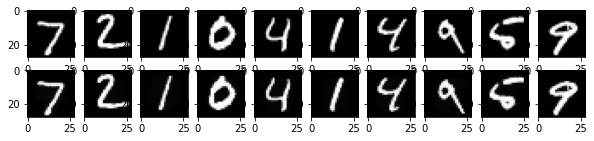

In [213]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tensorflow.keras import layers, Model


class encoder(Model):
    def __init__(self,n_hidden):
        super(encoder,self).__init__()
        self.fc1 = layers.Dense(n_hidden,activation='sigmoid')
        
    def call(self,x):
        out = self.fc1(x)
        return out
    
class decoder(Model):
    def __init__(self,n_input):
        super(decoder,self).__init__()
        self.fc1 = layers.Dense(n_input,activation='sigmoid')
        
    def call(self,x):
        out = self.fc1(x)
        return out
    
class encoder_decoder(Model):
    def __init__(self,encoder,decoder):
        super(encoder_decoder,self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self,x):
        h = self.encoder(x)
        rho = tf.reduce_mean(h,0)
        out = self.decoder(x)
        return h, out, rho

    

def logfunc(x, x2):
    return tf.multiply( x, tf.math.log(tf.math.divide(x,x2)))

def KL_Div(rho, rho_hat):
    invrho = tf.subtract(tf.constant(1.), rho)
    invrhohat = tf.subtract(tf.constant(1.), rho_hat)
    logrho = logfunc(rho,rho_hat) + logfunc(invrho, invrhohat)
    return logrho

def data_load():
    (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
    train_X, test_X , = train_X.reshape(-1,28*28), test_X.reshape(-1,28*28)
    train_X, test_X = train_X/255.0, test_X/255.0
    return np.float32(train_X), train_Y, np.float32(test_X), test_Y


    

def train(n_hidden,n_input,rho,lr,num_epochs,batch_size):
    
    enc = encoder(n_hidden=n_hidden)
    dec = decoder(n_input=n_input)
    model = encoder_decoder(encoder=enc, decoder=dec)
    model_graph = tf.function(model)
    
    train_X,train_Y, test_X, test_Y = data_load()
    num_train_recs = train_X.shape[0]
    order = np.arange(num_train_recs)
    num_batches = num_train_recs//batch_size
    
    optimizer = tf.keras.optimizers.Adam(lr)
    
    
    
    for i in range(num_epochs):
        epoch_loss = 0
        np.random.shuffle(order)
        train_X = train_X[order]
        for batch in range(num_batches):
            X_batch = train_X[batch*batch_size:(batch+1)*batch_size]
            X_batch = tf.constant(X_batch)
            bsize = X_batch.shape[0]
            
            with tf.GradientTape() as tape:
                _, X_pred_batch, rho_hat = model_graph(X_batch)
                reconst_loss = tf.reduce_mean(tf.pow(X_batch - X_pred_batch, 2))
                sparsity_loss =  0.01*tf.reduce_sum(KL_Div(rho,rho_hat))
                l2_reg_loss = 0.0001*tf.nn.l2_loss(model_graph.encoder.fc1.variables[0])
                #print(reconst_loss,sparsity_loss)
                loss = reconst_loss + sparsity_loss + l2_reg_loss
        
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            epoch_loss += loss.numpy()*bsize
        if i % 5 == 0:
            print(f"Training Loss at epoch {i}: {epoch_loss/num_train_recs}")
        
    # Check the quality of the 1st 10 test image reconstruction
    _,X_pred_test,_ = model_graph(tf.constant(test_X[:10,:]))
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        a[0][i].imshow(np.reshape(test_X[i,:], (28, 28)),cmap='gray')
        a[1][i].imshow(np.reshape(X_pred_test[i], (28, 28)),cmap='gray')
    return model, model_graph
            

model, model_graph = train(n_hidden=1024,n_input=28*28,rho=0.2,lr=0.01,num_epochs=100,batch_size=256)
            
   

# Plot of the Sparse feature weights learnt

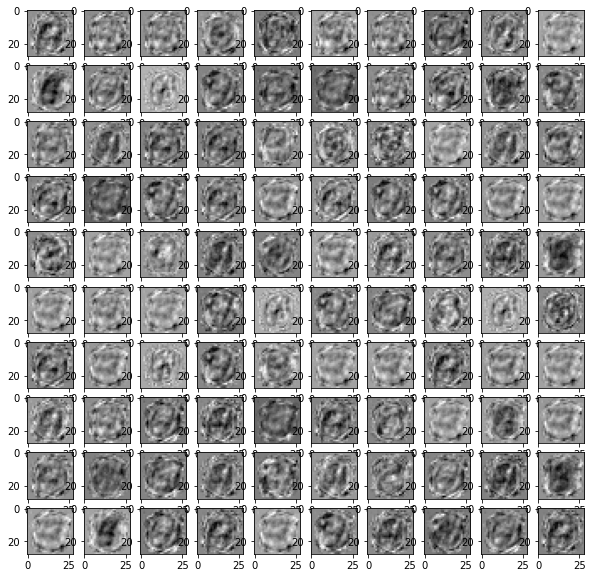

In [218]:

img_coll = []
for i in range(1024):
    img = np.array(encoder_weights.T[i,:])
    img = np.reshape(img,(28,28))
    img_coll.append(img)

img_coll = np.array(img_coll)
f, a = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
        a[0][i].imshow(np.reshape(img_coll[i], (28, 28)),cmap='gray')
        a[1][i].imshow(np.reshape(img_coll[10 + i], (28, 28)),cmap='gray')
        a[2][i].imshow(np.reshape(img_coll[20 + i], (28, 28)),cmap='gray')
        a[3][i].imshow(np.reshape(img_coll[30 + i], (28, 28)),cmap='gray')
        a[4][i].imshow(np.reshape(img_coll[40 + i], (28, 28)),cmap='gray')
        a[5][i].imshow(np.reshape(img_coll[50 + i], (28, 28)),cmap='gray')
        a[6][i].imshow(np.reshape(img_coll[60 + i], (28, 28)),cmap='gray')
        a[7][i].imshow(np.reshape(img_coll[70 + i], (28, 28)),cmap='gray')
        a[8][i].imshow(np.reshape(img_coll[80 + i], (28, 28)),cmap='gray')
        a[9][i].imshow(np.reshape(img_coll[90 + i], (28, 28)),cmap='gray')
        

# Listing 5-5 Denoising Auto Encoder Implementation in TensorFlow 

# Remove the Guassian Noise 

Training Loss at epoch 0: 27.623402111816407
Training Loss at epoch 5: 8.17118705444336
Training Loss at epoch 10: 7.255604565429688
Training Loss at epoch 15: 6.918293064371745


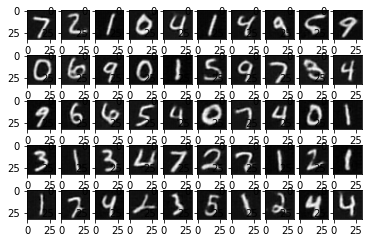

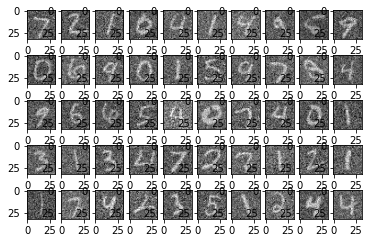

In [219]:
# Import the required library
from tensorflow.keras import layers, Model
from skimage import transform


    

class encoder(Model):
    def __init__(self):
        super(encoder,self).__init__()
        self.conv1 = layers.Conv2D(filters=32,kernel_size=5,strides=(2,2),padding='SAME')
        self.batchnorm1 = layers.BatchNormalization()
        self.act1 = layers.LeakyReLU()
        self.conv2 = layers.Conv2D(filters=16,kernel_size=5,strides=(2,2),padding='SAME')
        self.batchnorm2 = layers.BatchNormalization()
        self.act2 = layers.LeakyReLU()
        self.conv3 = layers.Conv2D(filters=8,kernel_size=5,strides=(4,4),padding='SAME')
        self.batchnorm3 = layers.BatchNormalization()
        self.act3 = layers.LeakyReLU()
        
    def call(self,x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        return x

class decoder(Model):
    def __init__(self):
        super(decoder,self).__init__()
        self.conv1 = layers.Conv2DTranspose(filters=16,kernel_size=5,strides=(4,4),padding='SAME')
        self.batchnorm1 = layers.BatchNormalization()
        self.act1 = layers.LeakyReLU()
        self.conv2 = layers.Conv2DTranspose(filters=32,kernel_size=5,strides=(2,2),padding='SAME')
        self.batchnorm2 = layers.BatchNormalization()
        self.act2 = layers.LeakyReLU()
        self.conv3 = layers.Conv2DTranspose(filters=1,kernel_size=5,strides=(2,2),padding='SAME')
        
    def call(self,x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.conv3(x)
        return x

class encoder_decoder(Model):
    def __init__(self,encoder,decoder):
        super(encoder_decoder,self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    
def data_load():
    (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
    train_X, test_X , = train_X.reshape(-1,28*28), test_X.reshape(-1,28*28)
    train_X, test_X = train_X/255.0, test_X/255.0
    #train_X[train_X < 0.5], test_X[test_X < 0.5] = 0.0, 0.0
    #train_X[train_X >= 0.5], test_X[test_X >= 0.5] = 1.0, 1.0
    return np.float32(train_X), train_Y, np.float32(test_X), test_Y

def resize_batch(imgs):
    # Resize to 32 for convenience 
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return np.float32(resized_imgs)

# Introduce Gaussian Noise
def gaussian_noise(image):
    row,col= image.shape
    mean,var = 0, 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy_image = image + gauss
    return np.float32(noisy_image)

def create_noisy_batch(image_arr,noise_profile='gaussian'):
    image_arr_out = []
    
    for i in range(image_arr.shape[0]):
        img = image_arr[i,:,:,0]
        if noise_profile == 'gaussian':
            img = gaussian_noise(img)
        else:
            img = salt_pepper_noise(img)
        image_arr_out.append(img)
    image_arr_out = np.array(image_arr_out)
    image_arr_out = image_arr_out.reshape(-1,32,32,1)
    return image_arr_out
    
    
    

# Introduce Salt and Pepper Noise
def salt_pepper_noise(image):
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.05
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

def train(lr,num_epochs=100,batch_size=256,noise_profile='gaussian'):
    
    enc = encoder()
    dec = decoder()
    model = encoder_decoder(encoder=enc, decoder=dec)
    model_graph = tf.function(model)
    
    train_X,train_Y, test_X, test_Y = data_load()
    num_train_recs = train_X.shape[0]
    order = np.arange(num_train_recs)
    num_batches = num_train_recs//batch_size
    
    optimizer = tf.keras.optimizers.Adam(lr)
    loss_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
    
    for i in range(num_epochs):
        epoch_loss = 0
        np.random.shuffle(order)
        train_X = train_X[order]
        for batch in range(num_batches):
            X_batch = train_X[batch*batch_size:(batch+1)*batch_size]
            #X_batch = X_batch.resize(-1,28,28,1)
            X_batch = resize_batch(X_batch) # Output as its the clean image
            X_batch_noisy = create_noisy_batch(X_batch,noise_profile=noise_profile) # Noisy input image
                
            X_batch_noisy , X_batch = tf.constant(X_batch_noisy), tf.constant(X_batch)
            
            bsize = X_batch.shape[0]
            
            with tf.GradientTape() as tape:
                X_pred_batch = model_graph(X_batch_noisy)
                #loss = tf.reduce_mean(tf.square(X_batch - X_pred_batch))  # calculate the mean square error loss
                loss = loss_fn(X_batch,X_pred_batch)
        
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            epoch_loss += loss.numpy()
        if i % 5 == 0:
            print(f"Training Loss at epoch {i}: {epoch_loss/num_train_recs}")
        
    # Check the quality of the 1st 50 test image reconstruction
    X_batch = test_X[:50,:]
    X_batch_resize = resize_batch(X_batch)
    X_batch_resize_noisy = create_noisy_batch(X_batch_resize,noise_profile=noise_profile)
    X_pred_test = model_graph(tf.constant(X_batch_resize_noisy))
    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(X_pred_test[i, ..., 0], cmap='gray')
    plt.figure(2)
    plt.title('Input Images with Gaussian Noise')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(X_batch_resize_noisy[i, ..., 0], cmap='gray')
    plt.show()
    return model, model_graph
            

model, model_graph = train(lr=0.01,num_epochs=20,batch_size=256,noise_profile='gaussian')



# Remove the Salt and Pepper Noise 

/tmp/ipykernel_16407/2259144778.py:118: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
/tmp/ipykernel_16407/2259144778.py:122: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


Training Loss at epoch 0: 40.0500886311849
Training Loss at epoch 5: 7.182995697021484
Training Loss at epoch 10: 5.918643566894532
Training Loss at epoch 15: 5.405584936523438


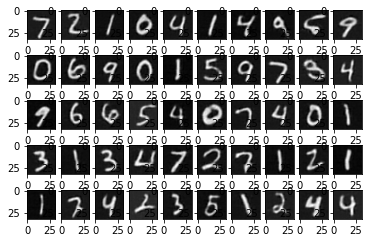

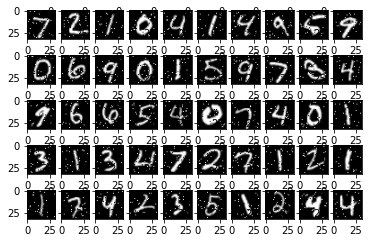

In [254]:
# Import the required library
from tensorflow.keras import layers, Model
from skimage import transform


    

class encoder(Model):
    def __init__(self):
        super(encoder,self).__init__()
        self.conv1 = layers.Conv2D(filters=32,kernel_size=5,strides=(2,2),padding='SAME')
        self.batchnorm1 = layers.BatchNormalization()
        self.act1 = layers.LeakyReLU()
        self.conv2 = layers.Conv2D(filters=16,kernel_size=5,strides=(2,2),padding='SAME')
        self.batchnorm2 = layers.BatchNormalization()
        self.act2 = layers.LeakyReLU()
        self.conv3 = layers.Conv2D(filters=8,kernel_size=5,strides=(4,4),padding='SAME')
        self.batchnorm3 = layers.BatchNormalization()
        self.act3 = layers.LeakyReLU()
        
    def call(self,x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        return x

class decoder(Model):
    def __init__(self):
        super(decoder,self).__init__()
        self.conv1 = layers.Conv2DTranspose(filters=16,kernel_size=5,strides=(4,4),padding='SAME')
        self.batchnorm1 = layers.BatchNormalization()
        self.act1 = layers.LeakyReLU()
        self.conv2 = layers.Conv2DTranspose(filters=32,kernel_size=5,strides=(2,2),padding='SAME')
        self.batchnorm2 = layers.BatchNormalization()
        self.act2 = layers.LeakyReLU()
        self.conv3 = layers.Conv2DTranspose(filters=1,kernel_size=5,strides=(2,2),padding='SAME')
        
    def call(self,x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.conv3(x)
        return x

class encoder_decoder(Model):
    def __init__(self,encoder,decoder):
        super(encoder_decoder,self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    
def data_load():
    (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
    train_X, test_X , = train_X.reshape(-1,28*28), test_X.reshape(-1,28*28)
    train_X, test_X = train_X/255.0, test_X/255.0
    #train_X[train_X < 0.5], test_X[test_X < 0.5] = 0.0, 0.0
    #train_X[train_X >= 0.5], test_X[test_X >= 0.5] = 1.0, 1.0
    return np.float32(train_X), train_Y, np.float32(test_X), test_Y

def resize_batch(imgs):
    # Resize to 32 for convenience 
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return np.float32(resized_imgs)

# Introduce Gaussian Noise
def gaussian_noise(image):
    row,col= image.shape
    mean,var = 0, 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy_image = image + gauss
    return np.float32(noisy_image)

def create_noisy_batch(image_arr,noise_profile='gaussian'):
    image_arr_out = []
    
    for i in range(image_arr.shape[0]):
        img = image_arr[i,:,:,0]
        if noise_profile == 'gaussian':
            img = gaussian_noise(img)
        else:
            img = salt_pepper_noise(img)
        image_arr_out.append(img)
    image_arr_out = np.array(image_arr_out)
    image_arr_out = image_arr_out.reshape(-1,32,32,1)
    return image_arr_out
    
    
    

# Introduce Salt and Pepper Noise
def salt_pepper_noise(image):
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.05
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

def train(lr,num_epochs=100,batch_size=256,noise_profile='gaussian'):
    
    enc = encoder()
    dec = decoder()
    model = encoder_decoder(encoder=enc, decoder=dec)
    model_graph = tf.function(model)
    
    train_X,train_Y, test_X, test_Y = data_load()
    num_train_recs = train_X.shape[0]
    order = np.arange(num_train_recs)
    num_batches = num_train_recs//batch_size
    
    optimizer = tf.keras.optimizers.Adam(lr)
    loss_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
    
    for i in range(num_epochs):
        epoch_loss = 0
        np.random.shuffle(order)
        train_X = train_X[order]
        for batch in range(num_batches):
            X_batch = train_X[batch*batch_size:(batch+1)*batch_size]
            #X_batch = X_batch.resize(-1,28,28,1)
            X_batch = resize_batch(X_batch) # Output as its the clean image
            X_batch_noisy = create_noisy_batch(X_batch,noise_profile=noise_profile) # Noisy input image
                
            X_batch_noisy , X_batch = tf.constant(X_batch_noisy), tf.constant(X_batch)
            
            bsize = X_batch.shape[0]
            
            with tf.GradientTape() as tape:
                X_pred_batch = model_graph(X_batch_noisy)
                #loss = tf.reduce_mean(tf.square(X_batch - X_pred_batch))  # calculate the mean square error loss
                loss = loss_fn(X_batch,X_pred_batch)
        
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            epoch_loss += loss.numpy()
        if i % 5 == 0:
            print(f"Training Loss at epoch {i}: {epoch_loss/num_train_recs}")
        
    # Check the quality of the 1st 50 test image reconstruction
    X_batch = test_X[:50,:]
    X_batch_resize = resize_batch(X_batch)
    X_batch_resize_noisy = create_noisy_batch(X_batch_resize,noise_profile=noise_profile)
    X_pred_test = model_graph(tf.constant(X_batch_resize_noisy))
    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(X_pred_test[i, ..., 0], cmap='gray')
    plt.figure(2)
    plt.title('Input Images with Gaussian Noise')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(X_batch_resize_noisy[i, ..., 0], cmap='gray')
    plt.show()
    
  
    return model, model_graph
            

model, model_graph = train(lr=0.01,num_epochs=20,batch_size=256,noise_profile='salt_and_pepper')



# Listing 5-6 Variational AutoEncoder Implementation

Training Loss at epoch 0: 0.17983988234202067
Training Loss at epoch 5: 0.06145528294245402


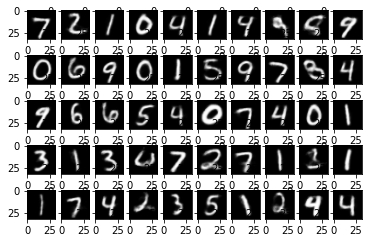

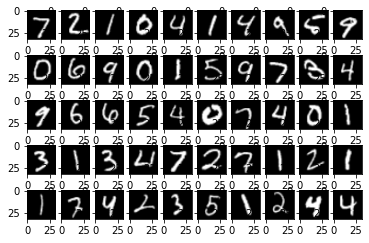

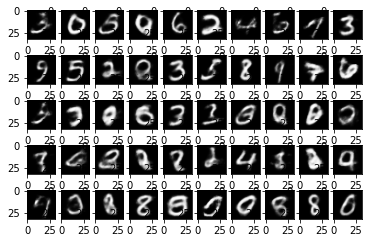

In [266]:

class encoder(Model):
    def __init__(self,n_hidden):
        super(encoder,self).__init__()
        self.n_hidden = n_hidden
        self.conv1 = layers.Conv2D(filters=64,kernel_size=4,strides=(2,2),padding='SAME')
        self.batchnorm1 = layers.BatchNormalization()
        self.act1 = layers.LeakyReLU(0.3)
        self.conv2 = layers.Conv2D(filters=64,kernel_size=4,strides=(2,2),padding='SAME')
        self.batchnorm2 = layers.BatchNormalization()
        self.act2 = layers.LeakyReLU(0.3)
        self.conv3 = layers.Conv2D(filters=64,kernel_size=4,strides=(2,2),padding='SAME')
        self.batchnorm3 = layers.BatchNormalization()
        self.act3 = layers.LeakyReLU(0.3)
        self.flatten = layers.Flatten()
        self.mean_layer = layers.Dense(n_hidden)
        self.log_var_layer  = layers.Dense(n_hidden)

        
    def call(self,x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        x = self.flatten(x)
        mean = self.mean_layer(x)
        log_var = self.log_var_layer(x)
        epsilon = tf.random.normal(tf.stack([tf.shape(x)[0],self.n_hidden])) 
        z  = mean + tf.multiply(epsilon,tf.exp(0.5*log_var))
        return z, mean, log_var
    
    
class decoder(Model):
    def __init__(self):
        super(decoder,self).__init__(0.3)
        self.fc1 = layers.Dense(32)
        self.act1 = layers.LeakyReLU(0.3)
        self.fc2 = layers.Dense(64)
        self.act2 = layers.LeakyReLU()
        self.conv1 = layers.Conv2DTranspose(filters=64,kernel_size=4,strides=(2,2),padding='SAME',activation='relu')
        self.conv2 = layers.Conv2DTranspose(filters=64,kernel_size=4,strides=(1,1),padding='SAME',activation='relu')
        self.conv3 = layers.Conv2DTranspose(filters=64,kernel_size=4,strides=(1,1),padding='SAME', activation='relu')
        self.flatten = layers.Flatten()
        self.fc3 = layers.Dense(32*32,activation='sigmoid')
         
    def call(self,x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = tf.reshape(x,[-1,8,8,1])
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc3(x)
        x = tf.reshape(x,[-1,32,32,1])
        return x
        
class encoder_decoder(Model):
    
    def __init__(self,encoder,decoder):
        super(encoder_decoder,self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self,x):
        z, mean, log_var = self.encoder(x)
        x = self.decoder(z)
        return x, mean, log_var

        
def KL_Div(mean,log_var):

    latent_loss = - 0.5 * tf.reduce_mean(log_var - tf.square(mean) - tf.exp(log_var) + 1)
    return latent_loss

def data_load():
    (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
    train_X, test_X , = train_X.reshape(-1,28*28), test_X.reshape(-1,28*28)
    train_X, test_X = train_X/255.0, test_X/255.0
    return np.float32(train_X), train_Y, np.float32(test_X), test_Y


def resize_batch(imgs):
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i,..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs


def train(n_hidden,lr,num_epochs=100,batch_size=128):

    
    enc = encoder(n_hidden)
    dec = decoder()
    model = encoder_decoder(encoder=enc, decoder=dec)
    model_graph = tf.function(model)
    
    train_X,train_Y, test_X, test_Y = data_load()
    num_train_recs = train_X.shape[0]
    order = np.arange(num_train_recs)
    num_batches = num_train_recs//batch_size
    
    optimizer = tf.keras.optimizers.Adam(lr)
    loss_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    
    for i in range(num_epochs):
        epoch_loss = 0
        np.random.shuffle(order)
        train_X = train_X[order]
        for batch in range(num_batches):
            X_batch = train_X[batch*batch_size:(batch+1)*batch_size]
            X_batch = resize_batch(X_batch)
            bsize = X_batch.shape[0]
            
            with tf.GradientTape() as tape:
                X_pred_batch, mean, log_sigma = model_graph(X_batch)
                X_batch = tf.constant(X_batch)
                #print(X_batch.shape,X_pred_batch.shape)
                loss_reconst = tf.reduce_mean(tf.reduce_sum(loss_fn(X_batch,X_pred_batch),(1,2)))
                loss_KL = KL_Div(mean,log_sigma)
                loss = loss_reconst + loss_KL
                #print(loss_reconst,loss_KL)
            
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            epoch_loss += loss.numpy()
        
        if i % 5 == 0:
            print(f"Training Loss at epoch {i}: {epoch_loss/num_train_recs}")
        
    # Check the quality of the 1st 50 test image reconstruction
    X_batch = test_X[:50,:]
    X_batch_resize = resize_batch(X_batch)
    X_pred_test,_,_ = model_graph(tf.constant(X_batch_resize))
    
    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(X_pred_test[i, ..., 0], cmap='gray')
    
    plt.figure(2)
    plt.title('Grounf Truth Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(X_batch_resize[i, ..., 0], cmap='gray')
        
    noise_z = tf.constant(np.random.normal(size=[50,n_hidden]))
    out_img = model.decoder(noise_z)
    plt.figure(3)
    plt.title('Input Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(out_img[i, ..., 0], cmap='gray')
    plt.show()
    return model, model_graph
            

model, model_graph = train(n_hidden=8,lr=0.001,num_epochs=10,batch_size=256)

     